In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("medical cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
for i in df.columns:
    print(df[i].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
['female' 'male']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

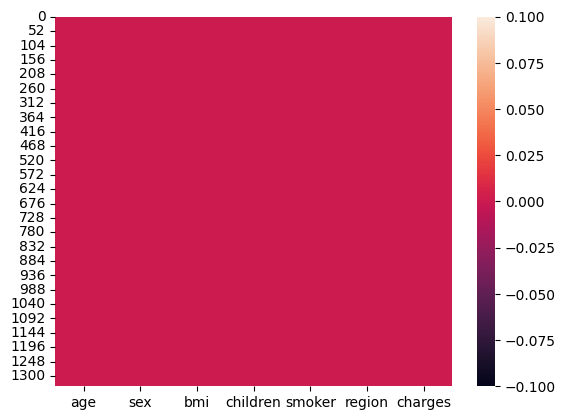

In [7]:
sns.heatmap(df.isnull(), cmap= "rocket")

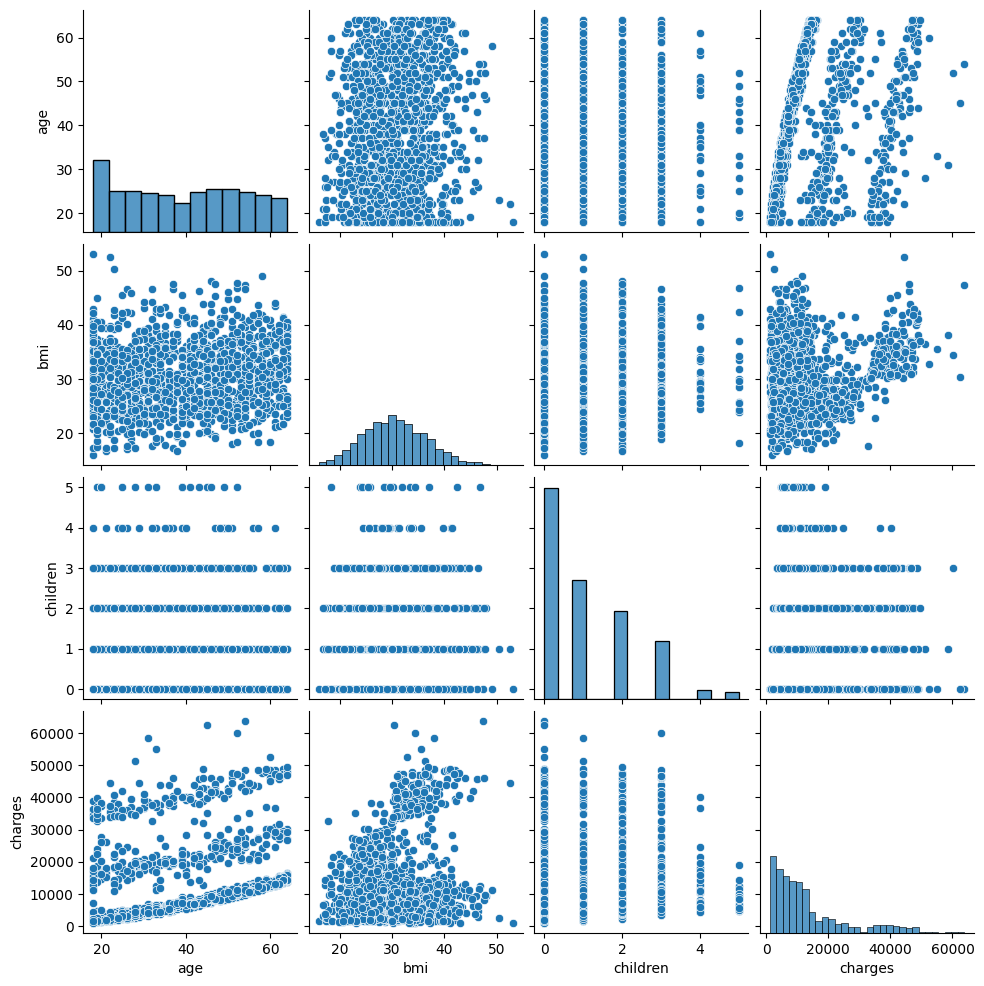

In [8]:
sns.pairplot(df)

<Axes: xlabel='age', ylabel='Count'>

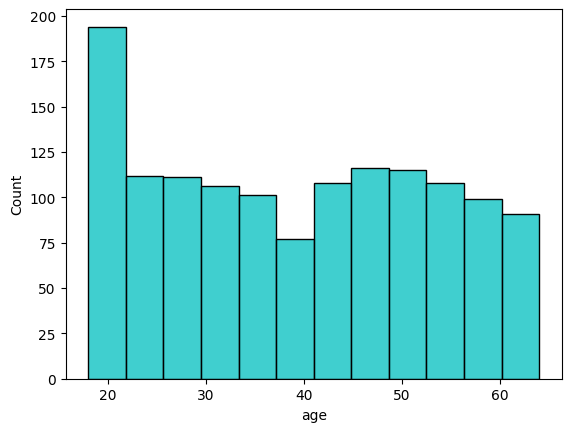

In [9]:
sns.histplot(data= df, x= "age", color= "c")

<Axes: xlabel='sex', ylabel='count'>

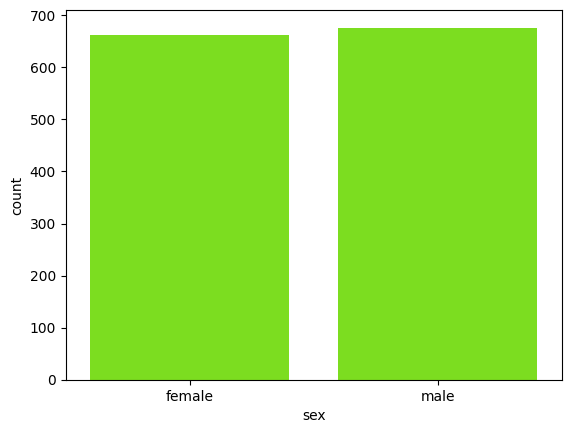

In [10]:
sns.countplot(data= df, x= "sex", color= "lawngreen")

<Axes: xlabel='children', ylabel='count'>

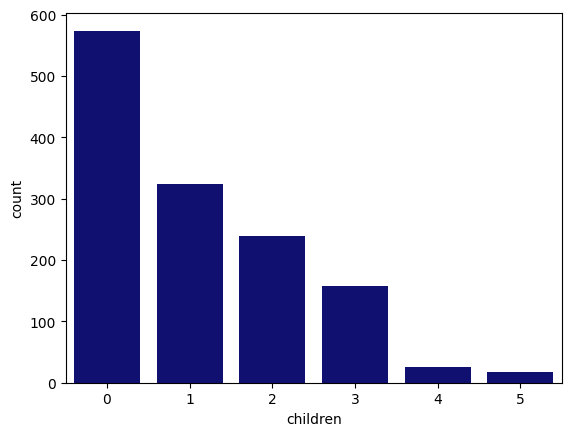

In [11]:
sns.countplot(data= df, x= "children", color= "navy")

<Axes: xlabel='smoker', ylabel='count'>

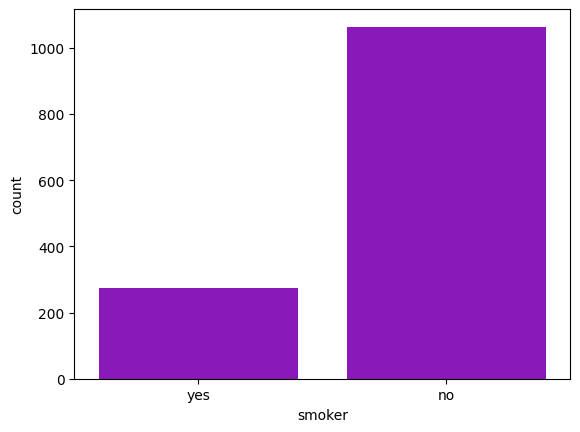

In [12]:
sns.countplot(data= df, x= "smoker", color= "darkviolet")

<Axes: xlabel='smoker', ylabel='count'>

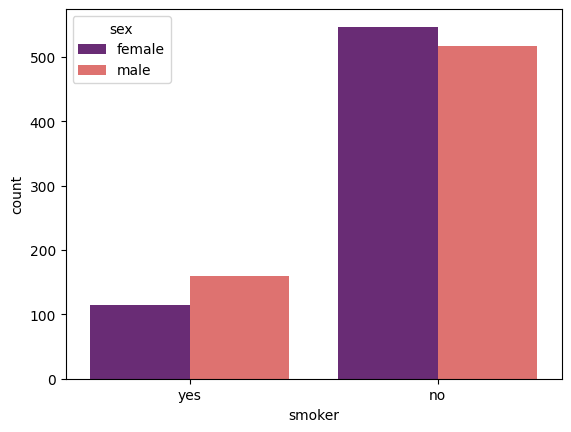

In [13]:
sns.countplot(data= df, x= "smoker", hue= "sex", palette= "magma")

<Axes: xlabel='age', ylabel='Count'>

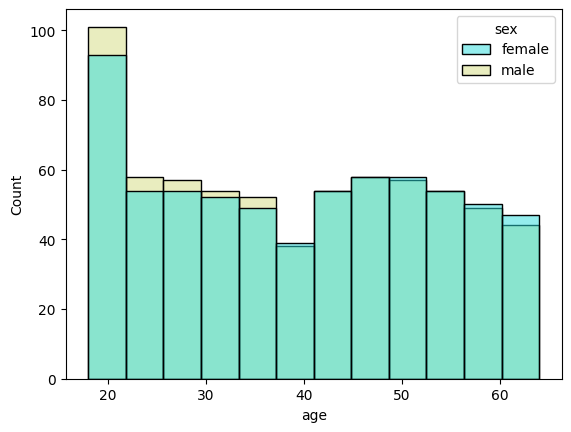

In [14]:
sns.histplot(data= df, x= "age", hue= "sex", palette= "rainbow")

<Axes: xlabel='age', ylabel='Count'>

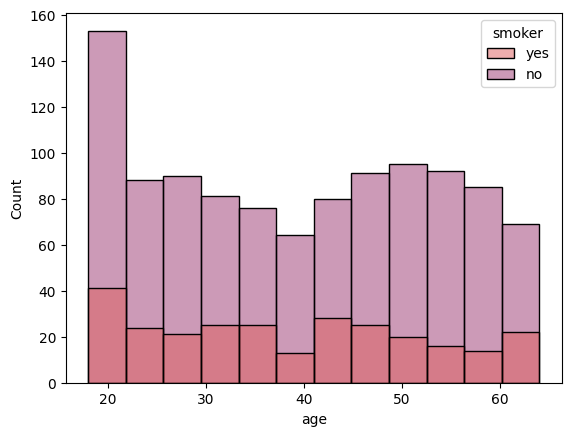

In [15]:
sns.histplot(data= df, x= "age", hue= "smoker", palette= "flare")

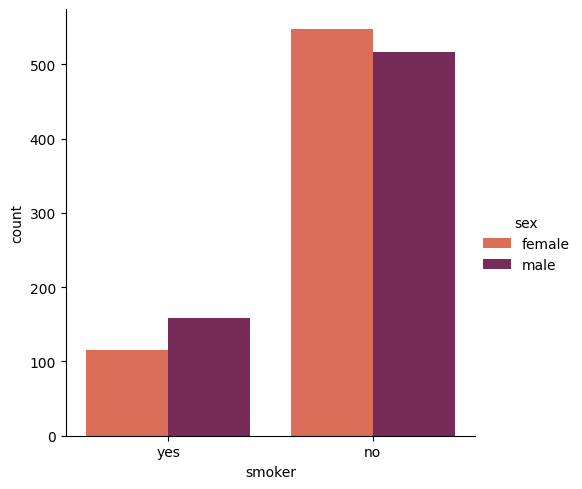

In [16]:
sns.catplot(data= df, x= "smoker", kind= "count", hue= "sex", palette= "rocket_r")

In [17]:
col_category = ["sex", "smoker", "region"]

en = LabelEncoder()

for col in col_category:
    df[col] = en.fit_transform(df[col])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

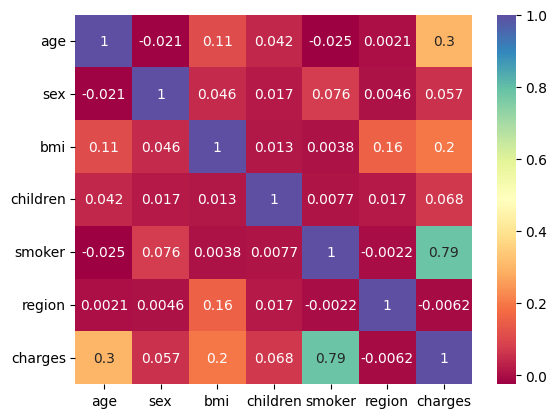

In [19]:
sns.heatmap(df.corr(), annot= True, cmap= "Spectral")

<Axes: xlabel='bmi', ylabel='Count'>

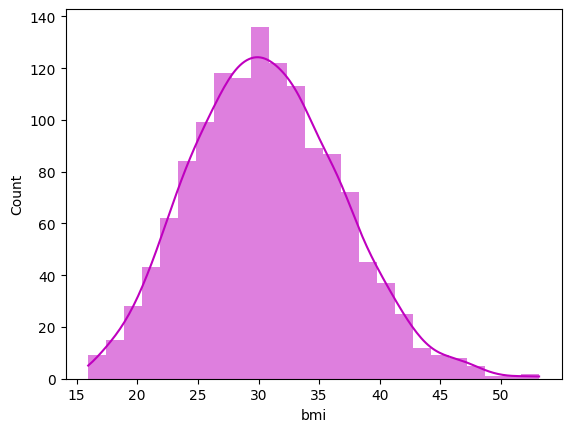

In [20]:
sns.histplot(df["bmi"], color= "m", kde= True, linewidth= 0)

<Axes: xlabel='charges', ylabel='Count'>

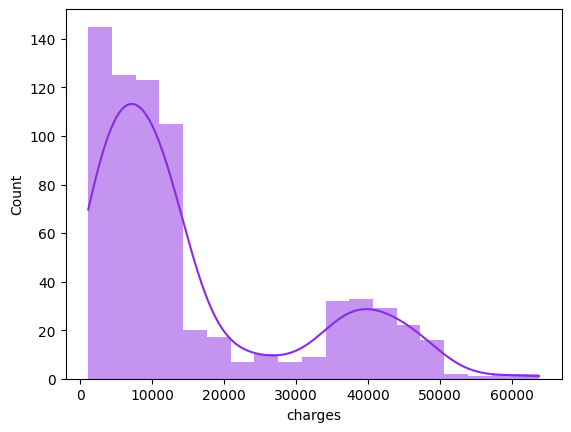

In [21]:
sns.histplot(df[(df.bmi >= 30)]["charges"], color = "blueviolet", kde= True, linewidth= 0)

<Axes: xlabel='charges', ylabel='Count'>

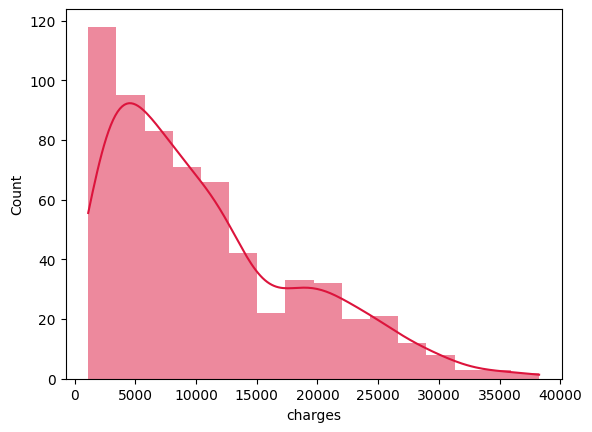

In [22]:
sns.histplot(df[(df.bmi < 30)]["charges"], color= "crimson", kde= True, linewidth= 0)

In [23]:
X = df.drop("charges", axis= 1)
y = df["charges"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 75)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
rf = RandomForestRegressor()

param_grid = {"n_estimators": [100, 200],
              "max_depth": [4, 5, 6, 7, 8],
              "max_features": ["auto", "sqrt", "log2"],
              "random_state": [0, 1, 42]
             }

In [28]:
cv_random = RandomizedSearchCV(rf, param_grid, cv= 5)
cv_random.fit(X_train, y_train)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200],
                                        'random_state': [0, 1, 42]})

In [29]:
cv_random.best_params_

{'random_state': 42,
 'n_estimators': 200,
 'max_features': 'log2',
 'max_depth': 8}

In [30]:
rfReg = RandomForestRegressor(n_estimators= 100, 
                              max_features= "log2", 
                              max_depth= 4, 
                              random_state= 75)

In [31]:
def prediction_model(model):
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

In [32]:
prediction_model(lr)

0.7655500212231608


In [33]:
prediction_model(rfReg)

0.8154090060926507
